<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *5*: *Naive Bayes***

###**Tenggat Waktu: 7 April 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. **Jalankan kode pada dokumen .ipynb** dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab5_NPM_Nama.ipynb**. Contoh: A_Lab5_2106123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **7 April 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

# **Pertanyataan Integritas**

In [723]:
# Isi dengan data diri Anda
NAMA = "Sri Saraswati Widhisari"
KELAS = "B"
NPM = "2206812180"
USERNAME_KAGGLE = 'posty_melek'

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [""]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["Slide KASDD Naive Bayes Slide KASDD Scaler, Slide KASDD Encoding, https://www.kaggle.com/code/carlmcbrideellis/recursive-feature-elimination-rfe-example"]

In [593]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sri Saraswati Widhisari dari kelas B dengan NPM 2206812180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sri Saraswati Widhisari)


# Naive Bayes

## A. Pengenalan Naive Bayes

Pada Lab kali ini, Anda akan mengimplementasi Naive Bayes Classifier dan melakukan pengukuran kinerja model. Sebelum itu, mari kita sekilas mempelajari tentang Naive Bayes Classifier terlebih dahulu.




 Algoritma Naive Bayes dikembangkan dari Teorema Bayes, yang memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah **asumsi yang sangat kuat akan independensi** dari masing-masing kondisi/kejadian.

Bayangkan bahwa Anda ingin membentuk classifier yang memprediksi golongan darah seseorang (apakah A, B, AB, atau O) berdasarkan sifat karakter seseorang (arogan, perhatian, teliti, humoris, sabar, dan sebagainya). Anda akan membentuk sebuah kuesioner kepribadian dan memberikannya ke orang-orang. Kuesioner tersebut dikumpulkan untuk menghasilkan sebuah dataset. Anggaplah
bahwa Kak Sudad mengatakan kepada Anda bahwa dia adalah orang yang perhatian, humoris, dan teliti. Bisakah Anda memanfaatkan informasi dari kuesioner yang Anda kumpulkan untuk memprediksi golongan darah Kak Sudad?.

Salah satu cara untuk memprediksi golongan darah Kak Sudad adalah dengan menggunakan teorema Naive Bayes. Jika kita ingin menghitung peluang golongan darah Kak Sudad adalah O karena diketahui Kak Sudad adalah orang yang perhatian, rumus probabilitas yang dapat digunakan adalah Aturan Bayes yang ditunjukkan di bawah ini.





$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O)p(O)}{\sum_{O'} p(O')p(\text{perhatian} \mid O')}
$$
<br/>
Catatan: $O'$ berarti bukan (negasi dari) golongan darah $O$.

Ketiga nilai tersebut bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita
tidak hanya menghitung $(O | perhatian), tetapi juga menghitung P(A | perhatian) , P(B | perhatian), dan P(AB | perhatian). Setelah kita hitung empat-empatnya, golongan darah yang peluangnya paling besar itulah yang kita
prediksi sebagai golongan darah Kak Sudad.

Namun, peneliti biasanya ingin rumus yang jumlah variabelnya sesedikit mungkin. Kalau kita pikirkan lebih lanjut, penyebut dari p(O|perhatian) dibagi oleh p(perhatian). Sama halnya, p(A | perhatian), p(B | perhatian), dan P(AB | perhatian) juga dibagi dengan p(perhatian) seperti yang dapat dilihat pada rumus-rumus di bawah ini.


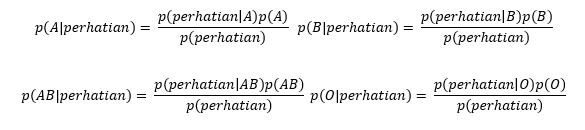

Jika keempat variabel memiliki pembagi yang sama, bukankah ini artinya urutan nilai P(A|perhatian),
P(B|perhatian) , P(AB|perhatian), dan P(O|perhatian) dari yang terbesar sampai yang terkecil tidak akan berubah meskipun penyebutnya (p(perhatian)) di-"coret"? Sehingga kita tidak perlu untuk menghitung nilai dari p(perhatian).

$$
p(O \mid \text{perhatian}) ∝ p(\text{perhatian}\mid O) p(O)
$$

Perhatikan rumus di atas (rumus ketika pembagian dengan P(perhatian) dihilangkan).
Nilai ini hanya menghitung probabilitas mempunyai golongan darah O jika Kak Sudad perhatian itu **SEBANDING** dengan perkalian antara probabilitas bahwa Kak Sudad itu perhatian jika dia bergolongan darah O.

Nah, bagaimana faktor seperti cerdas, sabar, teliti, atau sifat
seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


\begin{align}
p(O \mid P,T,S,H) &\propto p(O)p(P,T,S,H\mid O)
\end{align}


Keterangan :
*   T: teliti
*   H: humoris
*   S: Sabar
*   P: perhatian
*   O: golongan darah O






Dalam konteks Naive Bayes Classifier, kita mengasumsikan bahwa faktor seperti
teliti, humoris, dsb bersifat independen bersyarat (*conditionally independent*) apabila diketahui apakah seseorang itu bergolongan darah O. Artinya, rumus di atas bisa disimplifikasi sebagai berikut:

\begin{align}
p(P,T,S,H \mid O) = p(P\mid O) p(T \mid O) p(S \mid O) p(H \mid O)
\end{align}

Dengan demikian, berlaku bahwa


\begin{align}
p(O \mid P,T,S,H) &\propto p(O) p(P,T,S,H \mid O) \\
&= p(O) p(P\mid O)  p(T \mid O) p(S \mid O) p(H \mid O)
\end{align}

## B. Pengenalan Naive Bayes Dalam Scikit-learn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain


| Nama Model | Nama Modul |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini cocok digunakan untuk  data numerik yang mengikuti distribusi gausian dan kontinu.

- Multinomial Naive Bayes,
Asumsi data yang digunakan memiliki distribusi multinomial sederhana. Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori sehingga model naive bayes ini cocok digunakan pada fitur yang merepresentasikan jumlah maupun laju pertambahan. Contohnya yaitu pada klasifikasi text dimana fitur-fitur yang ada berkaitan dengan frekuensi kata pada dokumen yang ingin diklasifikasikan.

- Complement Naive Bayes,
Complement naive bayes mirip seperti multinomial naive bayes. Model ini ada karena model multinomial naive bayes tidak memiliki performa yang baik untuk dataset yang imbalanced dimana distribusi data tidak uniform. Akibatnya model tersebut data dengan mudah overfiting mengikuti data yang jumlahnya jauh lebih banyak. Model complement naive bayes ini cocok digunakan untuk dataset yang imbalanced.
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli mirip seperti multinomial namun data memiliki bentuk yang diskret dan terdistribusi dalam bentuk binary misalnya pada data gender, binary hot encoding, dll. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Model naive bayes untuk tipe data yang nilainya terdistribusi secara kategorikal. Jika data-data yang dimiliki bersifat kontinu maka harus ditransformasikan dalam bentuk diskret terlebih dahulu untuk menggunakan model ini. Misalnya yaitu data warna mata, ras, golongan darah, dll.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


Selengkapnya dapat dilihat pada dokumentasi modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. Hands On Naive Bayes

Dataset didalam example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting di bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


### Import Dataset

In [594]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

caesarian = pd.read_csv("example.csv")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [595]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64 

No. of unique values in column Blood of Pressure:
Normal    40
High      20
Low       20
Name: Blood of Pressure, dtype: int64 

No. of unique values in column Heart Problem:
apt      50
inept    30
Name: Heart Problem, dtype: int64 

No. of unique values in column Caesarian:
Yes    46
No     34
Name: Caesarian, dtype: int64 



### Preprocessing

In [596]:
# mengecek nilai null pada data
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [597]:
cek_null(caesarian)

Tidak ditemukan missing value pada dataset


In [598]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data : " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data : 8


Terdapat 8 data duplikat, maka kita perlu drop data tersebut terlebih dahulu.

In [599]:
caesarian_noduplicate = caesarian.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(caesarian_noduplicate.duplicated().sum()))

Jumlah duplikasi data : 0


<AxesSubplot:>

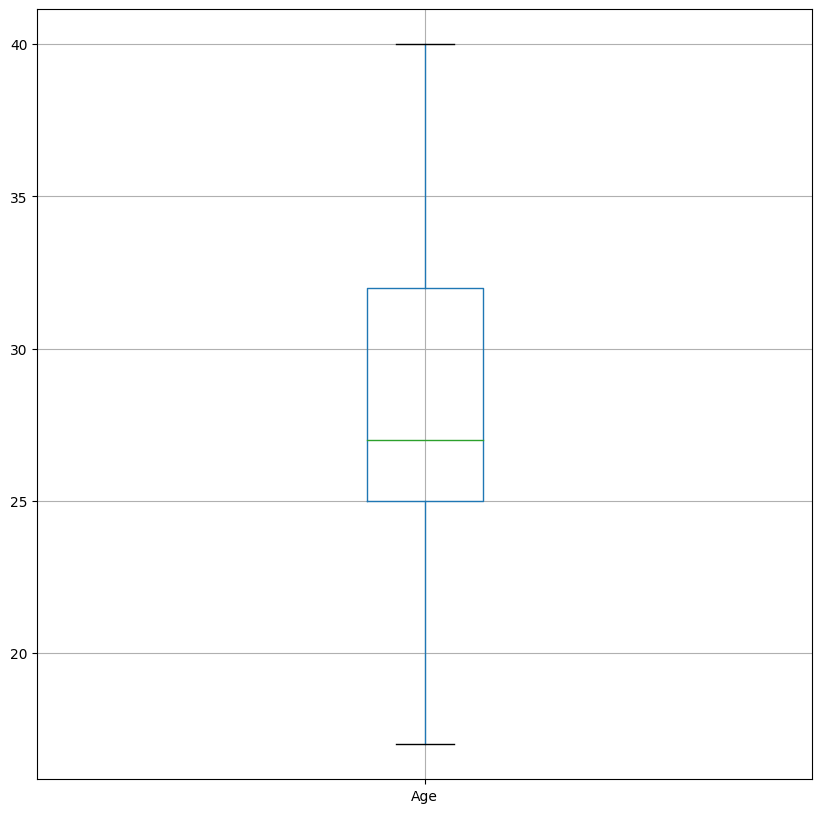

In [600]:
# mengecek keberadaan outlier
caesarian_noduplicate.boxplot(figsize=(10,10))

Tidak tampak ada outlier pada *data*

In [601]:
# mengembalikan data caesarian yang sudah clean ke variabel yang sebelumnya
caesarian = caesarian_noduplicate

### Independent Variable dan Dependent Variable

Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel dependen akan menjadi target sedangkan variabel independen akan menjadi fitur. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorik, maka kita perlu melakukan transformasi supaya data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya : <br>
* One hot encoding
* Label encoding (Natural Progression)
* Vector encoding
* dsb.


Teknik-teknik, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait kelebihan dan kekurangan ketiga teknik tersebut). Pada sesi tutorial ini, kita akan menggunakan teknik one hot encoding. <br><br>
Referensi apa itu one-hot encoding : <br>
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [602]:
# Proses Encoding menggunakan One-Hot encoding

df_dummy = pd.get_dummies(caesarian, drop_first=True)
df_dummy.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,0,1,0,0,0,0
1,26,0,1,0,1,0,1
2,26,1,0,0,1,0,0
3,28,0,1,0,0,0,0
4,22,0,1,0,1,0,1


<b><i> Pemicu : </i></b><br>
Kenapa kita buang fitur pertama dari setiap kolom setelah kita melakukan one-hot encoding? Jika teman-teman baca kembali pada penjelasan naive bayes, naive bayes memegang asumsi yang kuat <b>bahwa</b> setiap fitur independen satu sama lain. Setelah kita melakukan transformasi one hot encoding, akan terjadi korelasi yang sangat tinggi pada dataset kita. Semisal, setelah kita encoding variable gender, terbentuk fitur <b>is_male</b> dan juga <b>is_female</b>. Kedua fitur ini akan saling berkorelasi satu sama lain dengan sangat kuat yang dapat membuat proses training untuk beberapa algoritma menjadi berantakan. N-1 fitur saja sudah cukup, karena sudah dapat menampung semua informasi yang ada.  

In [603]:
# Variabel independen
x = df_dummy.drop(["Caesarian_Yes"], axis = 1)
x.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept
0,22,0,1,0,0,0
1,26,0,1,0,1,0
2,26,1,0,0,1,0
3,28,0,1,0,0,0
4,22,0,1,0,1,0


In [604]:
# Variabel dependen
y = df_dummy["Caesarian_Yes"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian_Yes, dtype: uint8

### Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [605]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 123)

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [606]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes, mengevaluasi hasil kfold, dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [607]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
#multinomial 
modelmulti = MultinomialNB()
#complement
modelcomple = ComplementNB()
modelbernouli = BernoulliNB()
modelcategorical = CategoricalNB()

In [608]:
scores = cross_val_score(modelnb, x_train, y_train, scoring='accuracy', cv=kfold)
scores_multi = cross_val_score(modelmulti, x_train, y_train, scoring='accuracy', cv=kfold)
scores_comple = cross_val_score(modelcomple, x_train, y_train, scoring='accuracy', cv=kfold)
scores_bernouli = cross_val_score(modelbernouli, x_train, y_train, scoring='accuracy', cv=kfold)
scores_categorical = cross_val_score(modelcategorical, x_train, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')
print(f'{scores_multi.mean()}')
print(f'{scores_comple.mean()}')
print(f'{scores_bernouli.mean()}')
print(f'{scores_categorical.mean()}')

Hasil Evaluasi cross validation:0.5742424242424242
0.5575757575757575
0.593939393939394
0.5393939393939393
nan


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Python310\lib\site-packages\sklearn\naive_bayes.py", line 106, in predict
    jll = self._joint_log_likelihood(X)
  File "c:\Python310\lib\site-packages\sklearn\naive_bayes.py", line 1530, in _joint_log_likelihood
    jll += self.feature_log_prob_[i][:, indices].T
IndexError: index 40 is out of bounds for axis 1 w

In [609]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(x_train, y_train)

GaussianNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [610]:
# Prediksi data test
y_pred = modelnb.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=uint8)

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [611]:
# Array data test
np.array(y_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=uint8)

### Classification Report

Setelah model kita training dan kita testing, kita akan mengevaluasi sebagus apa si model yang telah kita bangun tersebut. Ada beberapa nilai yang perlu kita perhatikan disini, yaitu accuracy, f1-score, recall, dan precision. Kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi dengan lebih detail. Melalui report ini, kita dapat menentukan apakah model kita sudah optimal atau belum.

In [612]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [613]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.60      0.67      0.63         9

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.52      0.53      0.52        15



Confusion Matrix



prediction,0,1
actual,,
0,2,4
1,3,6




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5333333333333333
F1 Macro Average: 0.4976076555023923
F1 Micro Average: 0.5333333333333333
Precision Macro Average: 0.5
Precision Micro Average: 0.5333333333333333
Recall Macro Average: 0.5
Recall Micro Average: 0.5333333333333333



Berdasarkan laporan di atas, kita dapat melihat bahwa model kita ternyata tidak terlalu baik (<b>OH TIDAK!</b>). Terlihat dari accuracy yang tidak terlalu bagus, begitu juga dengan nilai-nilai yang lainnya. Ada beberapa kemungkinan penyebab, berikut adalah detailnya, <br>
* Dataset yang tidak *balance* <br>
Perbandingan jumlah tiap class yang di-train tidak seimbang, yang menyebabkan proses training menjadi bias dan terlalu condong pada class dengan jumlah yang lebih banyak <br>
* Pemilihan algoritma Naive Bayes yang kurang sesuai <br>
Algoritma yang digunakan tidak sesuai dengan sifat data kita, sehingga menghasilkan model yang tidak optimal. Beberapa algoritma hanya cocok untuk distribusi tertentu saja.
* Data Preprocessing yang tidak optimal <br>

# Latihan Soal

Setelah mempelajari apa itu Naive bayes beserta contoh penerapannya pada Scikit-learn, langsung saja kita latihan 😊

## A. Pertanyaan Teoritis (Soal Pertama) [20]

### A. Soal Teoritis 1 [10]

Pada tahap *hands on Naive Bayes* sebelumnya, terlihat bahwa hasil evaluasi model masih kurang baik:
1. Menurut teman-teman, algoritma naive bayes apa yang menghasilkan hasil evaluasi paling baik untuk kasus sebelumnya?
2. Elaborasikan alasan mengapa teman-teman memilih algoritma tersebut di antara keseluruhan algoritma naive bayes lainnya? Menurut teman-teman, karakteristik apa dari algoritma tersebut yang menyebabkan algoritma tersebut menghasilkan kinerja paling baik dibandingkan yang lainnya.

> <b><i>Jawaban</i></b> : <br>
1. Menurut saya, algoritma naive bayes yang dapat menghasilkan hasil evaluasi paling baik untuk kasus caserian ini adalah complement naive bayes.
2. Ada dua alasan utama mengapa saya memilih model naive bayes complement, 1) penanganan ketidakseimbangan kelas. Pada dataset banyak data caesarian yes ada 46 dan no ada sebanyak 34, kelas yes lebih banyak sedikit. Meskipun begitu, tidak balance juga terjadi pada tiap nilai di tiap kelas seperti heart problem dengan apt 50 sedangkan inept 30, sedangkan nilai blood of pressures normal ada 40, giht 20, low 20, dan delivery no, timely ada 46, premature 17 dan latecomer 17. Perbedaan jumlah ini yang memberikan persentase dan kontribusi yang berbeda-beda pada saat training, hal ini akan menyebabkan bias pada model yang kita latih. CNB dapat menyelesaikan hal ini dengan juga memberikan bobot yang lebih besar pada fitur-fitur yang kurang umum di kelas taregt sehingga mnegruangi dampak dari ketidakseimbnagn tersebut.  2) Dibandingkan dengan naive bayes gaussian, CNB lebih tidak sensitif terhadap fitur tidak penting. Hal ini karena pada gaussian naive bayes mengasumsikan bahwa fitur numerik memiliki distribusi normal dan menggunakan informasi dari standar deviasi dan rata-rata untuk menghitung probabilitas. Fitur yang tidak penting atau tidak relevan pada dataset dapat berpengaruh secara signifikan pada distribusi normal, dan mempengaruhi kinerja model fitur-fitur numerik terdistribusi secara normal dan menggunakan informasi dari deviasi standar dan rata-rata untuk menghitung probabilitas. Fitur yang tidak penting atau tidak relevan dapat memiliki dampak signifikan pada distribusi normal, yang dapat mempengaruhi kinerja model.



> <b><i>Referensi</i></b> : <br>Slide KASDD tentag naive bayes 
- Referensi tulis di sini yaa, supaya asdos gampang nanti nilainya :D


### B. Soal Teoritis 2 [10]

 Menurut teman-teman, apa yang akan terjadi bila ada nilai atribut yang tidak muncul/terjadi pada setiap kelas yang ada? Apa dampaknya terhadap model Naive Bayes yang kita buat? Kemudian, jelaskan hal-hal apa saja yang dapat dilakukan untuk mengatasi masalah tersebut?

> <b><i>Jawaban</i></b> : <br>
Jika ada nilai atribut yang tidak muncul dalam satu atau beberapa kelas, maka probabilitas dari kondisional dari nilai tersebut dalam kelas menjadi nol. Hal ini menyebabkan nilai probabilitas posterior untuk seluruh kelas juga ikut menjadi nol (karena hasil perkalian probabilitas untuk setiap fitur atau kolom yang ada di data berdasarkan nilai kelas target). Hal ini berdampak juga pada overfit karena ketika nilai tidak muncul dalam data pelatihan tetapi muncul dalam data uji, model tidak dapat menggeneralisasi data baru tersebut.


Cara mengatasi hal tersebut dengan menambahkan jumlah pseudocloeon untuk tiap frekuensi nilai atribut (geser nilai) atau Laplacian Smoothing sehingga mencegah probabilitas nol, sehingga tetap ada probabilitasnya walaupun kecil tetapi setidaknya tidak meng-nol kan satu keseluruhan probabilitas posterior. Pendekatan lainya adalah memastikan terlebih dahulu apakah nilai atribut yang tidak muncul pada setiap kelas yang ada berasal dari atribut yang bergaun atau relevan dalam memprediksi kelas target, jika tidak kita sebaiknya dapat menghapus fitur tersebut. Pendekatan kedua bisa dengan ekstraksi fitur yang lebih kompleks misalnya kita mencatat kategori pendidikan pada pelanggan suatu toko A, seperti "TK,SD,SMP,SMA" , dan tidak ada pelanggan TK, kita bisa menggabungkan atau mengubah TK dan SD tetapi ini tentu dengan pertimbangan apakah keduanya memiliki similarity dari segi data dan karakteristik yang sama.



> <b><i>Referensi</i></b> : <br>
Slide KASSD tentang Naive Bayes
- Referensi tulis di sini yaa, supaya asdos gampang nanti nilainya :D

## B. Latihan Implementasi [70]

Kita akan mencoba membuat model klasifikasi untuk kasus penyakit Stroke pada dataset `stroke.csv`, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini.

Attribute Information

- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
- stroke: 1 if the patient had a stroke or 0 if not <br/>
Sumber : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [614]:
stroke = pd.read_csv("stroke.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [615]:
print("Jumlah baris : ", stroke.shape[0])
print("Jumlah kolom : ", stroke.shape[1])

Jumlah baris :  5110
Jumlah kolom :  12


In [616]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [617]:
# drop id karena tidak dibutuhkan
stroke = stroke.drop(["id"],axis=1)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### <b> Deskripsi Soal </b>

Target klasifikasi kita adalah atribut **stroke**. Atribut tersebut terdiri atas 2 nilai unik, **0 dan 1**, yang menyatakan apakah seorang pasien mengidap penyakit stroke atau tidak. **1** berarti stroke, sedangkan **0** sebaliknya. Secara sederhana, model yang akan kita buat diharapkan dapat memprediksi dengan baik status stroke dari pasien.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Gas, kita lanjut!

### 1. Preprocessing [20]

Lakukan preprocessing, dengan minimum spesifikasi sebagai berikut : <br>

* `Cek keberadaan missing values` jika ditemukan missing values lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan nilai duplikat` jika ditemukan lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan outlier` teman-teman bebas memilih penanganan outlier apa yang teman-teman gunakan, bisa dengan membuangnya atau mungkin membiarkannya saja dengan asumsi data normal. Dalam mencari outlier juga, teman-teman bebas menggunakan cara apapun, dengan tetap memberikan asumsi yang logis.


Teman-teman boleh mengembangkan tahapan ini, namun kriteria minimum yang wajib teman-teman lakukan adalah seperti diatas. Silahkan bereksplorasi :D

Cek keberadaan missing values

In [618]:
## TODO: 
## Cek keberadaan missing values
stroke.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Terdapat null value hanya ada di kolom bmi sebanyak 201, untuk memastikan apakah kita akan drop atau tidak,cek persentase missing value dari kolom bmi.







In [619]:
stroke["bmi"].isnull().sum()/ len(stroke["bmi"]) *100

3.9334637964774952

Karena data yang missing pada kolom ini hanya sekitar 4 persen, maka kita seharusnya bisa mengisi bmi ini, center data nya harus di cek terlebih dahulu untuk menentukan apakah kita bisa isi dengan mean atau median.





In [620]:
#cek skewness
stroke.bmi.skew()

1.0553402052962912

Nilai 1.05 ini menunjukkan adanya outlier pada ekor di sebelah kanan, ini berbearti ada kemungkinan adanya outloer dengan niali bmi yang tinggi.

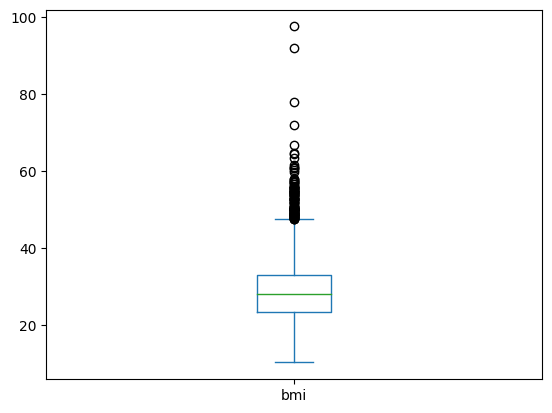

In [621]:
boxplot = stroke.bmi.plot(kind='box')

Kita bisa melihat outlier yang banyak setelah maksimum (Q3 - 1.5*IQR) dari box plot nya, oleh karena itu kita isi kolom ini dengan median saja. 

In [622]:
#isi missing value dengan median
stroke["bmi"].fillna(stroke["bmi"].median(), inplace=True)

In [623]:
#cek missing
stroke["bmi"].isnull().sum()  
#sudah nol   

0

Cek keberadaan nilai duplikat

In [624]:
stroke.duplicated().sum()

0

Tidak ada nilai duplikat pada data ini.

Cek keberadaan outliers

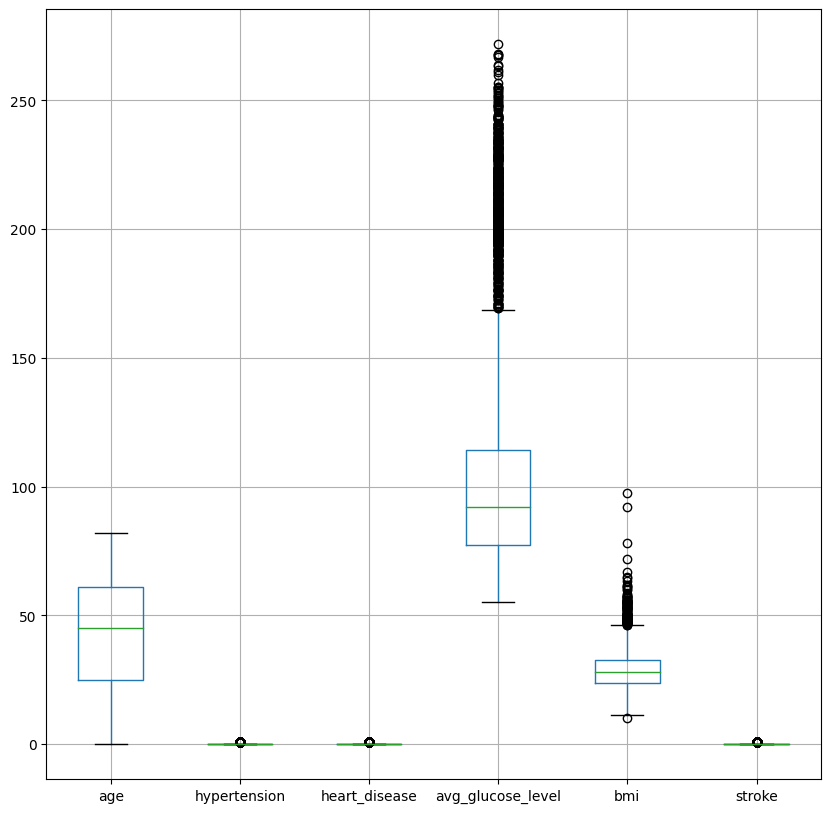

In [625]:
boxplot = stroke.boxplot(figsize=(10,10))


Kita bisa melihat bahwa outlier berada di atas maximum (upper 1,5 * IQR) whisker pada kolom avg_glucose_level, dan bmi

Cek lebih dalam line yang berupa nilai outliers dan jumlahnya  untuk memutuskan apakah outliers tersebut sekiranya valid dan justru tidak membuang variasi dari data


Outliers avg_glucose_level

In [626]:
avg_glucose_level = stroke['avg_glucose_level']

#Q1
Q1 = avg_glucose_level.quantile(0.25)
#Q3
Q3 = avg_glucose_level.quantile(0.75)

#IQR
IQR = Q3 - Q1
#UPPER
upper_bound_avg = Q3 + 1.5 * IQR
#LOWER
lower_bound_avg = Q1 - 1.5 * IQR
# OUTLIER
outliers = stroke[(avg_glucose_level < lower_bound_avg) | (avg_glucose_level > upper_bound_avg)]

print("Nilai Outlier pada Kolom avg_glucose_level:")
print(lower_bound_avg)
print(outliers)
print(len(outliers))
print(upper_bound_avg)
#upper bound -> 169.35750000002

Nilai Outlier pada Kolom avg_glucose_level:
21.977500000000006
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5061    Male  41.0             0              0          Yes        Private   
5062  Female  82.0             0              0          Yes  Self-employed   
5063    Male  39.0             0              0          Yes        Private   
5064    Male  70.0             0              0          Yes  Self-employed   
5076  Female  34.0             0              0          Yes        

In [627]:
outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [628]:
outliers[outliers['stroke']== 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
234,Male,78.0,0,0,Yes,Self-employed,Urban,218.46,26.8,Unknown,1
235,Female,68.0,0,0,Yes,Private,Rural,211.06,39.3,Unknown,1
241,Male,57.0,0,0,Yes,Private,Rural,197.28,34.5,formerly smoked,1
242,Male,68.0,0,0,Yes,Private,Rural,233.94,42.4,never smoked,1


In [629]:
outliers[outliers['stroke']== 0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
256,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
272,Male,71.0,0,0,Yes,Private,Urban,198.21,27.3,formerly smoked,0
277,Female,54.0,0,0,Yes,Private,Rural,206.72,26.7,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [630]:
stroke.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


In [631]:
#jumlah outliers 
len(outliers) / len(stroke) * 100

12.270058708414872

Persentase outliers hanya 12 persen, persentase ini termasuk kecil. Ditambah saya mencari informasi ternyata orang yang tidak didiagnosa stroke bukan berarti bahwa average glucose levelnya rendah. Faktor seperti pola makan tidak sehat seperti mengonsumsi makanan tinggi gula tau minuman beralkohol, stress, kurangnya aktivitas fisik, obesitas, genetika, dan faktor lainnya juga dapat membuat nilai average glucose level tinggi. Oleh karena itu kita biarkan saja outliers pada fitur ini.





BMI outliers

In [632]:
bmi = stroke['bmi']

#Q1
Q1 = bmi.quantile(0.25)
#Q3
Q3 = bmi.quantile(0.75)

#IQR
IQR = Q3 - Q1
#UPPER
upper_bound = Q3 + 1.5 * IQR
#LOWER
lower_bound = Q1 - 1.5 * IQR
# OUTLIER
outliers_BMI = stroke[(bmi < lower_bound) | (bmi > upper_bound)]

print("Nilai Outlier pada Kolom BMI:")
print(lower_bound)
print(outliers_BMI)
print(len(outliers_BMI))
print(upper_bound)
#upper bound -> 46

Nilai Outlier pada Kolom BMI:
10.300000000000006
      gender   age  hypertension  heart_disease ever_married      work_type  \
21    Female  52.0             1              0          Yes  Self-employed   
66    Female  70.0             0              0          Yes        Private   
113   Female  45.0             0              0          Yes        Private   
254   Female  47.0             0              0          Yes        Private   
258   Female  74.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
4906  Female  53.0             0              0          Yes        Private   
4952    Male  51.0             1              0          Yes  Self-employed   
5009  Female  50.0             0              0          Yes  Self-employed   
5057  Female  49.0             0              0          Yes       Govt_job   
5103  Female  18.0             0              0           No        Private   

  

In [633]:
outliers_BMI[outliers_BMI['bmi']< 10.3]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [634]:
#coba drop bmi naik ga korelasinya(?)
stroke_2 = stroke.copy()
#drop outlier 
# #stroke    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# stroke_2 = stroke_2[(stroke_2['bmi'] >= lower_bound) & (stroke_2['bmi'] <= upper_bound)]
# stroke_2 = stroke_2[(stroke_2['avg_glucose_level'] >= lower_bound_avg) & (stroke_2['avg_glucose_level'] <= upper_bound_avg)]

#corr ketika didrop lebih kecil daripada tidak didrop tadi 

In [635]:
#JUMLAH outliers pada bmi 
len(outliers_BMI) / len(stroke) * 100
#hanya 2 persen dari data yang ada 

2.4657534246575343

Outliers dari kedua kolom tersebut tidak perlu di drop dengan alasan persentase outliers yang kecil dan data tersebut bisa saja valid dalam dunia kedokteran





### 2. Persiapan Training [20]

Pada tahap ini, teman-teman diminta melakukan persiapan sebelum melakukan training. Berikut adalah hal-hal minimum yang harus teman-teman lakukan :
* `Lakukan encoding terhadap fitur-fitur yang masih dalam bentuk kategorikal`. Teman-teman dapat melakukan encoding dengan menggunakan library encoder apapun yang menurut teman-teman terbaik.

* `memilih dependent dan juga independent variables` teman-teman diminta untuk memilih dependent dan independent variables yang terbaik menurut penemuan teman-teman. Kalian bisa melakukan feature selection dengan ukuran terbaik menurut teman-teman. Kalin juga bisa menggunakan teknik lain, seperti mengecek korelasi atau melakukan literasi terkait penyakit Stroke. Bagian terpenting adalah, teman-teman <b> wajib </b> menjelaskan asumsi yang teman-teman ambil. ( <i> Hint </i> : jangan ambil fitur yang terlalu banyak ya teman-teman :D mulai dari kecil-kecil terlebih dahulu, baru jika ingin diimprovisasi perbesar sendiri perlahan dan perlahan)


* `membagi dataset menjadi training dan testing` bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan random state `123`. Pastikan juga pembagian training dan testing <b>merata</b> berdasarkan target atribut (<i>Hint</i> : perhatikan parameter yang digunakan pada train split test yang digunakan sebelumnya).


* `lakukan standarisasi` teman-teman bebas memilih standarisasi apa yang menurut teman-teman merupakan strategi terbaik. Bagian terpenting adalah, berikan alasan kenapa teman-teman menggunakan strategi tersebut. (<i>Hint</i> : perhatikan method yang digunakan saat standarisasi, jangan sampai keliru ketika melakukan standarisasi training dan testing).

Note: Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.

Melakukan encoding terhadap fitur-fitur dalam bentuk kategorikal

In [636]:

stroke.nunique()
#yang banyak cariasinya age, avg_glucose_Leve dan bmi. 
#categorical gender, hypertnesion, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [637]:
stroke.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [638]:
#Encode gender dengan one hot encoding karena ada male, female, dan other
stroke = pd.get_dummies(stroke, columns=['gender'], drop_first=True)
#dengan drop_firt untuk gender_Female agar mengurangi redundan

In [639]:
#hypertension, stroke dan heart_disease sudah termasuk binary, tidak perlu diencode


In [640]:
stroke.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [641]:
stroke = pd.get_dummies(stroke, columns=['ever_married'], drop_first=  True)

In [642]:
#karena stroke.work_type memiliki lebih dari 2 kategori, maka kita menggunakan one hot encoding
stroke = pd.get_dummies(stroke, columns=['work_type'], prefix='work', drop_first=True)


In [643]:
#hanya ada dua kategori utnuk residence type -> urban dan rural maka pakai label encodng dengan drop_first
stroke = pd.get_dummies(stroke, columns=['Residence_type'], drop_first=  True)

In [644]:
# smoking_status terdiri dari 4 kategori 'formerly smoked', 'never smoked', 'smokes', 'Unknown' -> menggunakan one hot encoding
#tanpa perlu drop_first = true
stroke = pd.get_dummies(stroke, columns=['smoking_status'])

In [645]:
stroke


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_Never_worked,work_Private,work_Self-employed,work_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,0,1,0,1,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,0,1,0,0


MELAKUKAN OVERSAMPLING SMOTE UNTUK IMBALANCE DATA 

In [646]:
print(len(stroke[stroke['stroke'] ==1]))
print(len(stroke[stroke['stroke'] ==0]))
print(len(stroke[stroke['stroke'] ==1])/len(stroke[stroke['stroke'] ==0])* 100)

249
4861
5.122402797778235


In [647]:
# #melakukan oversampling
# from imblearn.over_sampling import SMOTE
# df = stroke.copy()
# X = df.drop('stroke', axis=1)
# y = df['stroke']

# # SMOTE (Synthetic Minority Over-sampling Technique)
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # gabung variabel indepneden dan depnden setelah diresample
# df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)

# # Tampilkan hasil oversampling
# print(df_resampled['stroke'].value_counts())



Memilih fitur dependen dan Independent dengan RFE

In [648]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
stroke_2 = stroke.copy()
# Misalkan df adalah DataFrame Anda yang berisi data stroke
# Kolom 'stroke' adalah variabel dependen, dan lainnya adalah variabel independen

# Memisahkan variabel independen dan dependen
X = stroke_2.drop('stroke', axis=1)
y = stroke_2['stroke']

# Inisialisasi model yang akan digunakan
estimator = LogisticRegression()

# Inisialisasi RFE dengan estimator dan jumlah fitur yang ingin dipertahankan pada setiap iterasi
rfe = RFE(estimator, n_features_to_select=1)

# Fit RFE ke data
rfe.fit(X, y)

# Mendapatkan ranking fitur
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})

# Menampilkan ranking fitur
print(feature_ranking.sort_values(by='Ranking'))


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

                           Feature  Ranking
11                   work_children        1
2                    heart_disease        2
1                     hypertension        3
7                 ever_married_Yes        4
14  smoking_status_formerly smoked        5
9                     work_Private        6
15     smoking_status_never smoked        7
16           smoking_status_smokes        8
13          smoking_status_Unknown        9
0                              age       10
8                work_Never_worked       11
5                      gender_Male       12
10              work_Self-employed       13
12            Residence_type_Urban       14
6                     gender_Other       15
4                              bmi       16
3                avg_glucose_level       17


In [649]:
correlation = stroke_2.corr()['stroke'].abs().sort_values(ascending=False)
print(correlation)

stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married_Yes                  0.108340
work_children                     0.083869
smoking_status_formerly smoked    0.064556
work_Self-employed                0.062168
smoking_status_Unknown            0.055892
bmi                               0.036110
Residence_type_Urban              0.015458
work_Never_worked                 0.014882
work_Private                      0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
smoking_status_never smoked       0.004129
gender_Other                      0.003166
Name: stroke, dtype: float64


Perbedaan hasil antara korelasi dengan RFE ini disebakan korelasi emnggambarkan hubungan linear sedangkan RFE dapat berupa hubungan non linear. Dalam hal ini saya hanya 5 fitur yang berada di ranking tertinggi yakni
                          Feature  Ranking
                          
11                   work_children        1

2                    heart_disease        2

1                     hypertension        3

7                 ever_married_Yes        4

14  smoking_status_formerly smoked        5

In [650]:
df_feature_select = stroke[['work_children','heart_disease','hypertension','ever_married_Yes','smoking_status_formerly smoked','bmi', 'avg_glucose_level','stroke']]

In [651]:
#fitur dependensi adalah fitur stroke

In [652]:
X_baru = df_feature_select.drop('stroke', axis=1)
y_baru = df_feature_select['stroke']

Bagi dataset menjadi training dan test dengan test size 80 20, random state 123 agar bisa direporduceable , dan startify y_baru untuk memperhatahankan distirbusi kelas yang sama. 

In [653]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_baru, y_baru, test_size=0.2, random_state=123, stratify=y_baru)


In [654]:
ta = X_train[['bmi','avg_glucose_level']]

In [655]:
ta.describe()

,bmi,avg_glucose_level
count,4088.000000,4088.000000
mean,28.898068,106.387072
std,7.667658,45.531953
min,10.300000,55.120000
25%,23.800000,77.457500
50%,28.100000,91.990000
75%,32.800000,114.267500
max,97.600000,271.740000


Memilih scaler berupa Robust Scaler, alasannya karena kedua fitur numerik bmi dan avg_glucose_level memiliki rentang nilai yang luas, nilai maksimum juga jauh dari nilai median dan nilai kuartilnya. Adanya outliers membuat scaler ini cocok. Robust Outlier tidak terpengaruh oleh distribusi data yang tidak normal atau adanya outlier.





In [656]:
#terapkan scaler

from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)


In [657]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [658]:
X_train_scaled_df

,work_children,heart_disease,hypertension,ever_married_Yes,smoking_status_formerly smoked,bmi,avg_glucose_level
0,0.0,0.0,0.0,0.0,1.0,-0.844444,0.314045
1,0.0,0.0,0.0,0.0,0.0,0.133333,-0.214344
2,0.0,1.0,0.0,-1.0,0.0,0.422222,-0.167617
3,0.0,0.0,0.0,0.0,0.0,-0.055556,0.577832
4,0.0,0.0,0.0,0.0,0.0,-0.800000,-0.036403
...,...,...,...,...,...,...,...
4083,0.0,0.0,1.0,0.0,0.0,1.466667,-0.611519
4084,1.0,0.0,0.0,-1.0,0.0,-1.388889,-0.332247
4085,0.0,0.0,1.0,0.0,0.0,0.000000,-0.461016
4086,0.0,0.0,1.0,0.0,0.0,0.155556,0.272209


### 3. Implementasi Naive Bayes [30]

Pada tahapan ini, mahasiswa diminta untuk membangun model naive bayes dengan <b> syarat </b> memilih model naive bayes yang sesuai (**berikan alasan yang sesuai**). Teman-teman **boleh** melakukan parameter tuning untuk memaksimalkan model naive bayes. Kemudian, lakukan cross validation serta tampilkan rata-rata hasil evaluasi cross validationnya. Teman-teman dapat menggunakan algoritma cross_validation yang sesuai menurut teman-teman sekalian. Beberapa yang dapat digunakan misalnya `KFold` atau `StratifiedKFold`, teman-teman dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya. Kemudian jangan lupa mencantumkan hasil evaluasi cross validationnya. Tampilkan juga hasil evaluasi model dan berikan analisis teman-teman terkait hasil evaluasi model. Berikan saran perbaikan yang sesuai menurut pendapat teman-teman jika ternyata model yang diperoleh tidak optimal.

**Catatan**: Ingat bahwa model kita ingin memprediksi apakah pasien mengidap stroke atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model teman-teman dengan metrik evaluasi tersebut.

<b><i> Hint </i></b> : <br>
Lihat distribusi nilai dari setiap feature yang telah teman-teman pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, teman-teman bisa menentukan model apa yang optimal.

Ingat yaa, biasakan menggunakan cell dengan tipe markdown untuk memberikan komentar atau catatan :D

In [659]:
## TODO: Answer here
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE()

# Oversampling pada data pelatihan, BUKAN PADA DATA TEST 
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
# Inisialisasi semua jenis Naive Bayes
classifiers = {
    'GaussianNB': GaussianNB(),
    #'MultinomialNB': MultinomialNB(),
    #'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB(),
    #'CategoricalNB': CategoricalNB()
    #jenis nauve bayes lainnya tidak bisa menghandle adanya nilai minus pada nilai attirbut data 
}

#cross validasi menggunakan pada k-fold cross validation 
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train_smote, y_train_smote, cv=5, scoring='precision')
    print(f"{name}:")
    print("Hasil eval cross-validation (Accuracy):")
    print(scores)
    print("Rata-rata akurasi cross-validation:", scores.mean())
    print()

#gausiaannb -> recall nya 0.91 (lumayan stabil untuk tiap iterasi) ; precisionnnya : 0.59 
#bernoullinb -> recallnya 0.58;  precisionnya : 0.70
    #berarti menggunkana gaussian saja  -> karena lebih mementingkan 

GaussianNB:
Hasil eval cross-validation (Accuracy):
[0.59195402 0.59427609 0.5918197  0.59243697 0.6011657 ]
Rata-rata akurasi cross-validation: 0.5943304973615273

BernoulliNB:
Hasil eval cross-validation (Accuracy):
[0.69316375 0.69953052 0.71904762 0.72818792 0.72089314]
Rata-rata akurasi cross-validation: 0.7121645897751372



Melihat distirbusi tiap nilai fitur di data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'gender_Male'}>,
        <AxesSubplot:title={'center':'gender_Other'}>],
       [<AxesSubplot:title={'center':'ever_married_Yes'}>,
        <AxesSubplot:title={'center':'work_Never_worked'}>,
        <AxesSubplot:title={'center':'work_Private'}>,
        <AxesSubplot:title={'center':'work_Self-employed'}>],
       [<AxesSubplot:title={'center':'work_children'}>,
        <AxesSubplot:title={'center':'Residence_type_Urban'}>,
        <AxesSubplot:title={'center':'smoking_status_Unknown'}>,
        <AxesSubplot:title={'center':'smoking_status_formerly smoked'}>],
       [<AxesSubplot:title={'center':'smoking_status_never smoked'}>,
        <Axes

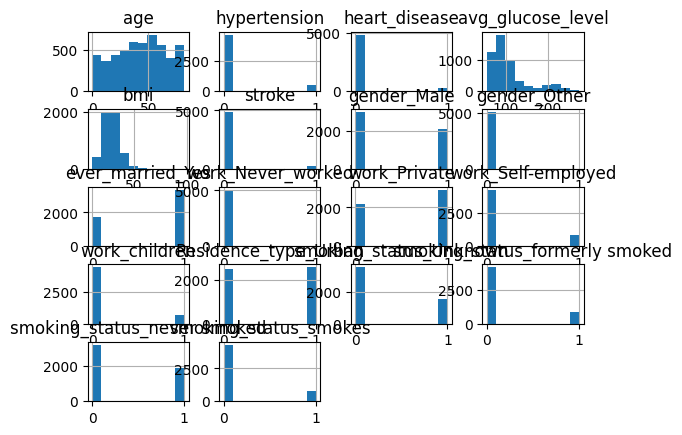

In [660]:
stroke.hist()

Memilih scaler berupa Robust Scaler, alasannya karena kedua fitur numerik bmi dan avg_glucose_level memiliki rentang nilai yang luas, nilai maksimum juga jauh dari nilai median dan nilai kuartilnya. Adanya outliers membuat scaler ini cocok. Robust Outlier tidak terpengaruh oleh distribusi data yang tidak normal atau adanya outlier.





<AxesSubplot:>

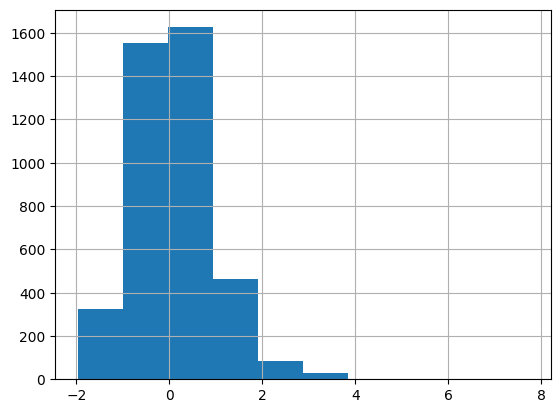

In [661]:
X_train_scaled_df.bmi.hist()

<AxesSubplot:>

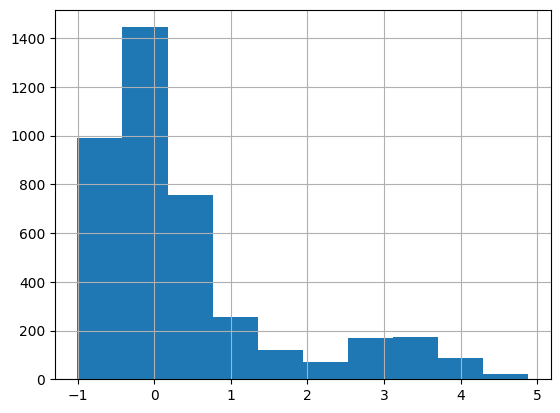

In [662]:
X_train_scaled_df.avg_glucose_level.hist()

Karena sebelumnya saya sudah melakukan oversampling untuk balance antara data yang sekelas stroke dan tidak stroke, maka saya cukup menggunakan K-fold cross validation saja sebanyak 5 fold, bukan stratified k-fold cross validation. Sedangkan LOOCV juga tidak terlalu sesuai dengan jenis dataset ini, apalagi datasetnya ada ribuan, ini tentu memberikan kinerja komputasi yang lebih besar dan tidak sesuai dengan tujuannya untuk dipakai pada data yang terbatas.





## C. Kaggle Competition! [10]

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan sebagai sarana untuk berlatih, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Klasifikasi-Lab 5](https://www.kaggle.com/t/9cb1a26cde154db4a3b8205bfdb69d17)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 5 ini, kalian **diwajibkan** untuk mengikuti kompetisi kaggle di atas.

Kode untuk kaggle competition

In [663]:
stroke_train = pd.read_csv('stroke_train.csv')
stroke_test = pd.read_csv('stroke_test.csv')

Preprocessing[1]

In [664]:
#cek misisng values
stroke_train.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64

In [665]:
#cek misisng values
stroke_test.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
dtype: int64

In [666]:
stroke_train["bmi"].isnull().sum()/ len(stroke["bmi"]) *100

3.111545988258317

In [667]:
stroke_test["bmi"].isnull().sum()/ len(stroke["bmi"]) *100

0.821917808219178

In [668]:
stroke_test.bmi.skew()

1.2090117314997144

In [669]:
stroke_train.bmi.skew()

1.0191719233551237

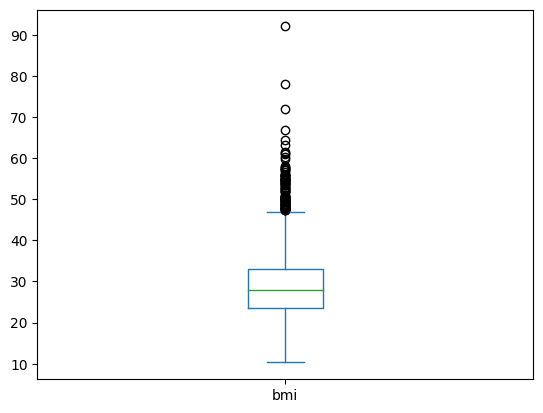

In [670]:
boxplot = stroke_train.bmi.plot(kind='box')

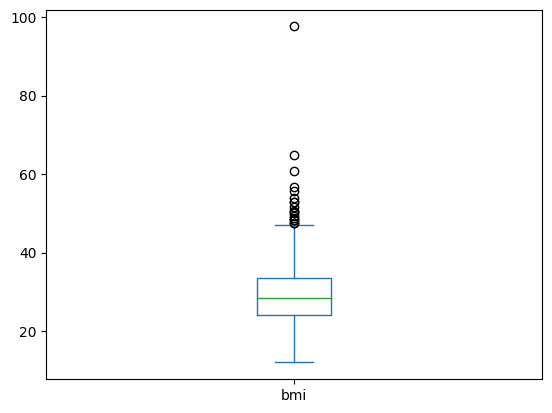

In [671]:
boxplot = stroke_test.bmi.plot(kind='box')

In [672]:
stroke_train["bmi"].fillna(stroke_train["bmi"].median(), inplace=True)

In [673]:
stroke_test["bmi"].fillna(stroke_test["bmi"].median(), inplace=True)

In [674]:
stroke_train["bmi"].isnull().sum()  

0

In [675]:
stroke_test["bmi"].isnull().sum()  

0

Cek nilai duplikat

In [676]:
stroke_train.duplicated().sum()

0

In [677]:
stroke_test.duplicated().sum()

0

Keberadaan outliers sebelumnya sudah dilihat dan sam dengan analisis pada section nomor sebelmnya, saya memilih untuk menggunakan saja data dari outliers tesebut yang nantinya distandaraisaisi dengan robust scaler





Preperation for Training [2]

In [678]:
#encoding pada fitur-fitur yg masih dalam bentuk kategorikal
stroke_train = pd.get_dummies(stroke_train, columns=['gender'], drop_first=True)
stroke_test = pd.get_dummies(stroke_test, columns=['gender'], drop_first=True)
stroke_train = pd.get_dummies(stroke_train, columns=['ever_married'], drop_first=True)
stroke_test = pd.get_dummies(stroke_test, columns=['ever_married'], drop_first=True)
stroke_train = pd.get_dummies(stroke_train, columns=['work_type'], prefix='work', drop_first=True)
stroke_test = pd.get_dummies(stroke_test, columns=['work_type'], prefix='work', drop_first=True)
stroke_train = pd.get_dummies(stroke_train, columns=['Residence_type'], drop_first=True)
stroke_test = pd.get_dummies(stroke_test, columns=['Residence_type'], drop_first=True)
stroke_train = pd.get_dummies(stroke_train, columns=['smoking_status'])
stroke_test = pd.get_dummies(stroke_test, columns=['smoking_status'])


In [679]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
stroke_2_train = stroke_train.copy()

X_train_baru = stroke_2_train.drop('stroke', axis=1)
y_train_baru = stroke_2_train['stroke']

estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(X_train_baru, y_train_baru)

feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})

print(feature_ranking.sort_values(by='Ranking'))


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

                           Feature  Ranking
11                   work_children        1
3                avg_glucose_level        2
2                    heart_disease        3
14  smoking_status_formerly smoked        4
12            Residence_type_Urban        5
15     smoking_status_never smoked        6
9                     work_Private        7
16           smoking_status_smokes        8
1                     hypertension        9
13          smoking_status_Unknown       10
8                work_Never_worked       11
6                     gender_Other       12
5                      gender_Male       13
7                 ever_married_Yes       14
4                              bmi       15
0                              age       16
10              work_Self-employed       17


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pemilhan fitur pada dataset train dan dataset test

In [680]:
stroke_train = stroke_train[['work_children','heart_disease','hypertension','ever_married_Yes','smoking_status_formerly smoked','bmi', 'avg_glucose_level','stroke']]

In [681]:
stroke_test = stroke_test[['work_children','heart_disease','hypertension','ever_married_Yes','smoking_status_formerly smoked','bmi', 'avg_glucose_level']]

In [682]:
stroke_test

,work_children,heart_disease,hypertension,ever_married_Yes,smoking_status_formerly smoked,bmi,avg_glucose_level
0,0,0,0,1,1,24.4,89.99
1,0,0,0,1,1,39.1,110.36
2,1,0,0,0,0,20.4,110.33
3,0,0,0,0,0,27.1,88.85
4,0,1,0,1,0,19.4,78.70
...,...,...,...,...,...,...,...
1017,0,0,0,1,1,25.0,79.14
1018,1,0,0,0,0,19.5,73.27
1019,0,0,0,1,0,28.8,232.81
1020,0,0,0,1,0,26.4,71.06


Distribusi tiap kelas

In [688]:
stroke_train.stroke.value_counts()
#imbalance nanti pakai smote aja untuk cross validationnya 

0    3889
1     199
Name: stroke, dtype: int64

In [689]:
#ubah stroke_train jadi X_train_real dan y_train_real
#ubah stroke_test jadi X_test_real
#soalnya yang ga real kemungkinan bisa mucnul dengan cross_validation
X_train_real = stroke_train.drop('stroke', axis=1)
y_train_real = stroke_train['stroke']

In [690]:
X_test_real = stroke_test

In [691]:
X_train_real

,work_children,heart_disease,hypertension,ever_married_Yes,smoking_status_formerly smoked,bmi,avg_glucose_level
0,0,1,0,1,0,28.0,88.27
1,0,0,0,1,1,31.1,91.05
2,0,0,0,0,1,28.3,91.82
3,1,0,0,0,0,18.0,68.34
4,0,1,0,1,0,25.2,67.84
...,...,...,...,...,...,...,...
4083,0,0,0,1,0,24.1,96.03
4084,0,0,0,1,0,28.6,92.82
4085,0,0,1,1,0,28.9,72.67
4086,1,0,0,0,0,25.4,207.45


Melakukan standarisasi dengan scaler

In [708]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_scaled_real = robust_scaler.fit_transform(X_train_real)
X_test_scaled_real = robust_scaler.transform(X_test_real)
#X_TRAIN_REAL berasal dari stroke_train dan stroke_test
#ada menggunakan y_train_real

Implementasi Naive Bayes

In [710]:
## TODO: Answer here
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE()

# Oversampling pada data pelatihan, BUKAN PADA DATA TEST 
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled_real, y_train_real)
# Inisialisasi semua jenis Naive Bayes
classifiers = {
    'GaussianNB': GaussianNB(),
    #'MultinomialNB': MultinomialNB(),
    #'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB(),
    #'CategoricalNB': CategoricalNB()
    #jenis nauve bayes lainnya tidak bisa menghandle adanya nilai minus pada nilai attirbut data 
}


#cross validasi menggunakan pada k-fold cross validation
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train_smote, y_train_smote, cv=5, scoring='precision')
    print(f"{name}:")
    print("Hasil eval cross-validation (Accuracy):")
    print(scores)
    print("Rata-rata akurasi cross-validation:", scores.mean())
    print()

#gausiaannb -> recall nya 0.88 (lumayan stabil untuk tiap iterasi) ; precisionnnya : 0.60
#bernoullinb -> recallnya 0.63;  precisionnya : 0.63
    #berarti menggunkana gaussian saja  -> karena lebih mementingkan 

GaussianNB:
Hasil eval cross-validation (Accuracy):
[0.60189983 0.59332192 0.6037415  0.61694616 0.60673162]
Rata-rata akurasi cross-validation: 0.6045282046468444

BernoulliNB:
Hasil eval cross-validation (Accuracy):
[0.62656642 0.62808843 0.63580247 0.63059701 0.63015464]
Rata-rata akurasi cross-validation: 0.6302417931608983



In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
model = GaussianNB()
#hyperparameter yang diuji
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42, stratify=y_train_smote)
# Inisialisasi GridSearchCV dengan stratified cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', verbose=1)
# Melatih model pada data dengan menggunakan GridSearchCV
grid_search.fit(X_train_split, y_train_split)
# Hasil parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# memprediski dengan modelnya 
y_pred = grid_search.predict(X_test_split)

#evaluasi dengan f1 score
f1 = f1_score(y_test_split, y_pred)
print("F1 Score:", f1)

#ADA KEMUNNGKINAN DIBANDINGKAN DENGAN HASIL LEADERBOARD INI SANGAT OVERFIT -> PERBAIKAN BERIKUTNYA MENCOBA LEBIH DALAM DALAM MEMILIH FITUR YANG SESUAI , SEPERTINYA PEMLIHAN FITUR TERLALU GENERAL, SEHINGGA DATA DATA YANG BARU TIDAK BEGITU DIMENGERTI OLEH MDOEL


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'var_smoothing': 1e-05}
F1 Score: 0.7112712300566134


Predict dengan GaussianNB

In [717]:

stroke_test_untuk_concat = pd.read_csv('stroke_test.csv')

In [720]:


# Inisialisasi model Gaussian Naive Bayes
model = GaussianNB(var_smoothing=1e-05)

# Melatih model pada data pelatihan
model.fit(X_train_scaled_real, y_train_real)

# Melakukan prediksi pada data pengujian
y_pred_real = model.predict(X_test_scaled_real)

# Membuat DataFrame hasil prediksi
result_df = pd.DataFrame({'id': stroke_test_untuk_concat['id'], 'stroke': y_pred_real})

# Menampilkan hasil
print(result_df)



         id  stroke
0     15311       0
1     70455       0
2     27436       0
3     33768       0
4      4712       1
...     ...     ...
1017  28265       0
1018  16145       0
1019   3715       1
1020  13818       0
1021  69524       0

[1022 rows x 2 columns]


In [722]:
#ubah dari result_df menjadi dataframe
result_df.to_csv('submission.csv', index=False)

# ----Selesai----